In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
# Set some pandas options
#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', 10)
#pd.set_option('display.max_rows', 10)
# And some items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#pd.options.display.mpl_style = 'default'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows=None

In [2]:
data=np.random.randint(10,size=10)
s=Series(data)
s
s[[1,3]]#索引从1开始
s=Series([1,2,3,4],index=['a','b','c','d'])
s
s.index

0    5
1    7
2    6
3    4
4    5
5    7
6    4
7    0
8    1
9    6
dtype: int32

1    7
3    4
dtype: int32

a    1
b    2
c    3
d    4
dtype: int64

Index(['a', 'b', 'c', 'd'], dtype='object')

In [3]:
s=pd.date_range('2014-07-01','2014-07-06')
s

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
tmp1=Series([80,82,85,90,83,87],index=s)
tmp1.head(3)

2014-07-01    80
2014-07-02    82
2014-07-03    85
Freq: D, dtype: int64

In [5]:
tmp1.mean()

84.5

In [6]:
tmp2 = Series([70, 75, 69, 83, 79, 77],index = s)

In [7]:
tmp2-tmp1

2014-07-01   -10
2014-07-02    -7
2014-07-03   -16
2014-07-04    -7
2014-07-05    -4
2014-07-06   -10
Freq: D, dtype: int64

In [8]:
tmp2['2014-07-02']

75

In [9]:
tmps=DataFrame({'hn':tmp1,'zj':tmp2})
tmps.head(2)
tmps['zj']
tmps.hn

,hn,zj
2014-07-01,80,70
2014-07-02,82,75


2014-07-01    70
2014-07-02    75
2014-07-03    69
2014-07-04    83
2014-07-05    79
2014-07-06    77
Freq: D, Name: zj, dtype: int64

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: hn, dtype: int64

In [10]:
tmps['new']=tmp2-tmp1
tmps.head(3)

,hn,zj,new
2014-07-01,80,70,-10
2014-07-02,82,75,-7
2014-07-03,85,69,-16


In [11]:
tmps.columns

Index(['hn', 'zj', 'new'], dtype='object')

In [12]:
tmps.new[1:3]

2014-07-02    -7
2014-07-03   -16
Freq: D, Name: new, dtype: int64

In [16]:
tmps.hn>80

2014-07-01    False
2014-07-02     True
2014-07-03     True
2014-07-04     True
2014-07-05     True
2014-07-06     True
Freq: D, Name: hn, dtype: bool

In [19]:
tmps.new[tmps.hn>80]

2014-07-02    -7
2014-07-03   -16
2014-07-04    -7
2014-07-05    -4
2014-07-06   -10
Freq: D, Name: new, dtype: int64

In [2]:
# imports for reading data from Yahoo!
from pandas_datareader import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta
# read the last three months of data for GOOG
goog = DataReader("GOOG", "yahoo",date.today() +relativedelta(months=-3))
# the result is a DataFrame
#and this gives us the 5 most recent prices
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-21,1740.849976,1699.000000,1713.510010,1739.369995,1828400,1739.369995
2020-12-22,1737.405029,1712.574951,1734.430054,1723.500000,936700,1723.500000
2020-12-23,1747.989990,1725.040039,1728.109985,1732.380005,1033800,1732.380005
2020-12-24,1746.000000,1729.109985,1735.000000,1738.849976,346800,1738.849976
2020-12-28,1790.728027,1746.334961,1751.635010,1776.089966,1392500,1776.089966


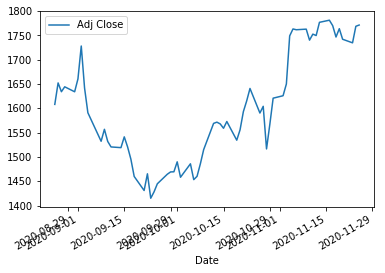

In [24]:
goog.plot(y='Adj Close')

In [8]:
goog['new']=goog['Adj Close']*2
goog.head(5)

,High,Low,Open,Close,Volume,Adj Close,new
Date,,,,,,,
2020-09-28,1476.800049,1449.301025,1474.209961,1464.520020,2007900,1464.520020,2929.040039
2020-09-29,1476.662964,1458.805054,1470.390015,1469.329956,978200,1469.329956,2938.659912
2020-09-30,1489.750000,1459.880005,1466.800049,1469.599976,1700600,1469.599976,2939.199951
2020-10-01,1499.040039,1479.209961,1484.270020,1490.089966,1779500,1490.089966,2980.179932
2020-10-02,1483.199951,1450.920044,1462.030029,1458.420044,1284100,1458.420044,2916.840088


TypeError: 'Series' object is not callable

In [10]:
df=pd.DataFrame(np.random.randn(3,4))
df

,0,1,2,3
0,0.026841,0.260214,0.221081,0.262310
1,-0.362294,-0.024296,-0.933265,-0.265779
2,0.403456,1.679061,0.012211,1.913986


In [42]:
df=pd.DataFrame(np.random.randn(3,4),columns=list('abcd'))
df

,a,b,c,d
0,1.603338,1.646451,0.661408,-0.010841
1,0.896294,1.353003,0.498521,0.652574
2,-0.472254,0.276486,0.756741,0.708830


In [46]:
new_df=df.rename({'a':'ax','b':'bx'},axis='columns')
new_df
df

,h,e,f,g
0,1.603338,1.646451,0.661408,-0.010841
1,0.896294,1.353003,0.498521,0.652574
2,-0.472254,0.276486,0.756741,0.708830


,h,e,f,g
0,1.603338,1.646451,0.661408,-0.010841
1,0.896294,1.353003,0.498521,0.652574
2,-0.472254,0.276486,0.756741,0.708830


In [47]:
#df.columns={'a','b','c','d'}
df.columns=['d','e','f','g']
df.head(5)

,d,e,f,g
0,1.603338,1.646451,0.661408,-0.010841
1,0.896294,1.353003,0.498521,0.652574
2,-0.472254,0.276486,0.756741,0.708830


In [32]:
df.loc[::-1].reset_index(drop=True)

,e,d,g,f
0,-0.262602,0.870116,0.227148,-0.231753
1,-0.682887,0.118717,0.273732,1.434555
2,-0.777750,-0.073170,-0.581905,-1.293337


In [49]:
df.dtypes

d    float64
e    float64
f    float64
g    float64
dtype: object

In [9]:
df=pd.DataFrame({'col_1':['1','2','3'],'col_2':['22','23','25'],'col_3':['31','32','33']})
df.head()
df.dtypes
df=df.apply(pd.to_numeric,errors='coerce')
df.dtypes
df.col_1+2

0    3
1    4
2    5
Name: col_1, dtype: int64

In [ ]:
pd.to_numeric(df.col_1)
df.col_1+2
df.apply(pd.to_numeric)

In [17]:
df['col_1'].head()

0    1
1    2
2    3
Name: col_1, dtype: object

In [7]:
import pandas as pd
df=pd.DataFrame({'col':['1','2','3']})
df.head()
df=df.apply(pd.to_numeric)
print(df.dtypes)
df.col+2

col    int64
dtype: object


0    3
1    4
2    5
Name: col, dtype: int64

In [6]:
import pandas as pd

import glob
for file in glob.glob(r'data/stock*.csv'):
    print(file)

df=pd.concat((pd.read_csv(file) for file in glob.glob(r'data/stock*.csv')),ignore_index=True)
df=df.sample(frac=1.0)
df.head(5)
df2=pd.concat((pd.read_csv(file) for file in  glob.glob(r'data/stock*.csv')),axis='columns')
df2.head(5)



data\stock1.csv
data\stock2.csv
data\stock3.csv


,id,name,score
12,13,test13,68
10,11,test11,66
21,22,test23,81
3,4,test4,59
4,5,test5,60


,id,name,score,id,name,score,id,name,score
0,1,test1,56,10,test10,65,19,test20,78
1,2,test2,57,11,test11,66,20,test21,79
2,3,test3,58,12,test12,67,21,test22,80
3,4,test4,59,13,test13,68,22,test23,81
4,5,test5,60,14,test14,69,23,test24,82


In [11]:
import numpy as np 
cut_points = [np.percentile(df['score'], i) for i in [50, 80, 95]] 
cut_points
df['group'] = 1 
for i in range(3): 
    df['group'] = df['group'] + (df['c'] < cut_points[i]) # 或者 <= cut_points[i]
'''    

[69.0, 80.8, 84.7]

"\ndf['group'] = 1 \nfor i in range(3): \n    df['group'] = df['group'] + (df['c'] < cut_points[i]) # 或者 <= cut_points[i]\n"